In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-d17ffisv because the default path (/home/jedrz/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('./data/yoga_ds_Xy.csv')
df.head()

,pose,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,hanumanasana,0.261698,0.512255,0.237344,0.517355,0.238441,0.486026,0.242483,0.497878,0.248089,0.430958,0.367178,0.538518,0.387603,0.384369,0.499620,0.636762,0.571360,0.408937,0.507275,0.613798,0.512541,0.537128,0.642621,0.483038,0.651845,0.414223,0.678855,0.221365,0.722782,0.674401,0.683820,0.050615,0.795440,0.924660
1,hanumanasana,0.394864,0.491497,0.370693,0.487102,0.375714,0.461120,0.381811,0.450995,0.400140,0.402480,0.469273,0.476875,0.489038,0.369958,0.284926,0.459736,0.293156,0.364300,0.129571,0.411152,0.128241,0.366531,0.801084,0.531412,0.807697,0.396388,0.854739,0.710447,0.805349,0.174530,0.908731,0.943022,0.702517,0.003883
2,hanumanasana,0.430713,0.753430,0.439265,0.780632,0.419011,0.763575,0.482887,0.787360,0.431683,0.748734,0.562005,0.740352,0.428825,0.666439,0.454851,0.820907,0.359842,0.751076,0.304485,0.911850,0.281378,0.896933,0.663071,0.526064,0.622483,0.486750,0.743239,0.589924,0.719260,0.579058,0.728648,0.731057,0.723543,0.732710
3,hanumanasana,0.369197,0.440116,0.368485,0.460600,0.366005,0.458955,0.407975,0.471238,0.402241,0.471895,0.486930,0.451505,0.477786,0.438180,0.310605,0.387581,0.316607,0.398412,0.201966,0.395528,0.202583,0.408442,0.779203,0.490484,0.778978,0.435595,0.848863,0.726469,0.786196,0.241361,0.854160,0.963011,0.808341,0.036816
4,hanumanasana,0.262922,0.548760,0.245587,0.531681,0.244322,0.532350,0.257699,0.483209,0.258080,0.478274,0.352506,0.491654,0.344671,0.456864,0.494184,0.450990,0.501478,0.424227,0.629732,0.514949,0.630355,0.499815,0.620420,0.528923,0.624212,0.459428,0.690590,0.708224,0.755988,0.298930,0.741362,0.910159,0.699116,0.092350


In [4]:
pose_var_df = df.groupby('pose').var()
pose_var_df.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
pose,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
adho mukha svanasana,0.003104,0.010226,0.003107,0.013963,0.003035,0.014427,0.003270,0.019507,0.003124,0.020187,0.003527,0.012707,0.003495,0.014445,0.002818,0.038226,0.003002,0.039262,0.003841,0.089493,0.004518,0.091358,0.006610,0.013284,0.006119,0.013906,0.003397,0.056701,0.004422,0.057209,0.003387,0.123370,0.024020,0.123558
adho mukha vriksasana,0.027085,0.007709,0.029307,0.008502,0.029035,0.008672,0.029414,0.009337,0.025543,0.009801,0.019150,0.010137,0.018113,0.009680,0.016114,0.010809,0.019487,0.010031,0.024028,0.011969,0.023805,0.011285,0.009138,0.008434,0.009008,0.008870,0.020473,0.006303,0.023655,0.010797,0.043327,0.019011,0.043249,0.019213
agnistambhasana,0.002625,0.002768,0.002438,0.003063,0.002279,0.002954,0.001180,0.003904,0.000940,0.002868,0.001053,0.005547,0.000807,0.001829,0.002866,0.007037,0.002844,0.002597,0.011594,0.011397,0.010843,0.013262,0.001768,0.003941,0.001282,0.003422,0.003443,0.003951,0.002096,0.013002,0.002861,0.006865,0.002936,0.006123
ananda balasana,0.005046,0.087976,0.005813,0.109216,0.005550,0.112480,0.012074,0.095818,0.007311,0.100272,0.007146,0.023357,0.008374,0.031854,0.012028,0.021142,0.013371,0.020788,0.018616,0.037455,0.021384,0.035843,0.009409,0.112778,0.013406,0.105295,0.011922,0.034337,0.023049,0.031484,0.012147,0.046186,0.016278,0.039523
anantasana,0.002730,0.129520,0.002658,0.141306,0.003357,0.142913,0.003519,0.137756,0.004158,0.142347,0.007151,0.095038,0.010177,0.101695,0.023271,0.126104,0.025713,0.139000,0.029944,0.116943,0.030490,0.133968,0.003669,0.009497,0.005096,0.009816,0.021162,0.009554,0.023024,0.010750,0.059891,0.046350,0.065464,0.031615


In [40]:
min(k_list), max(k_list)

(107, 212)

In [62]:
import re

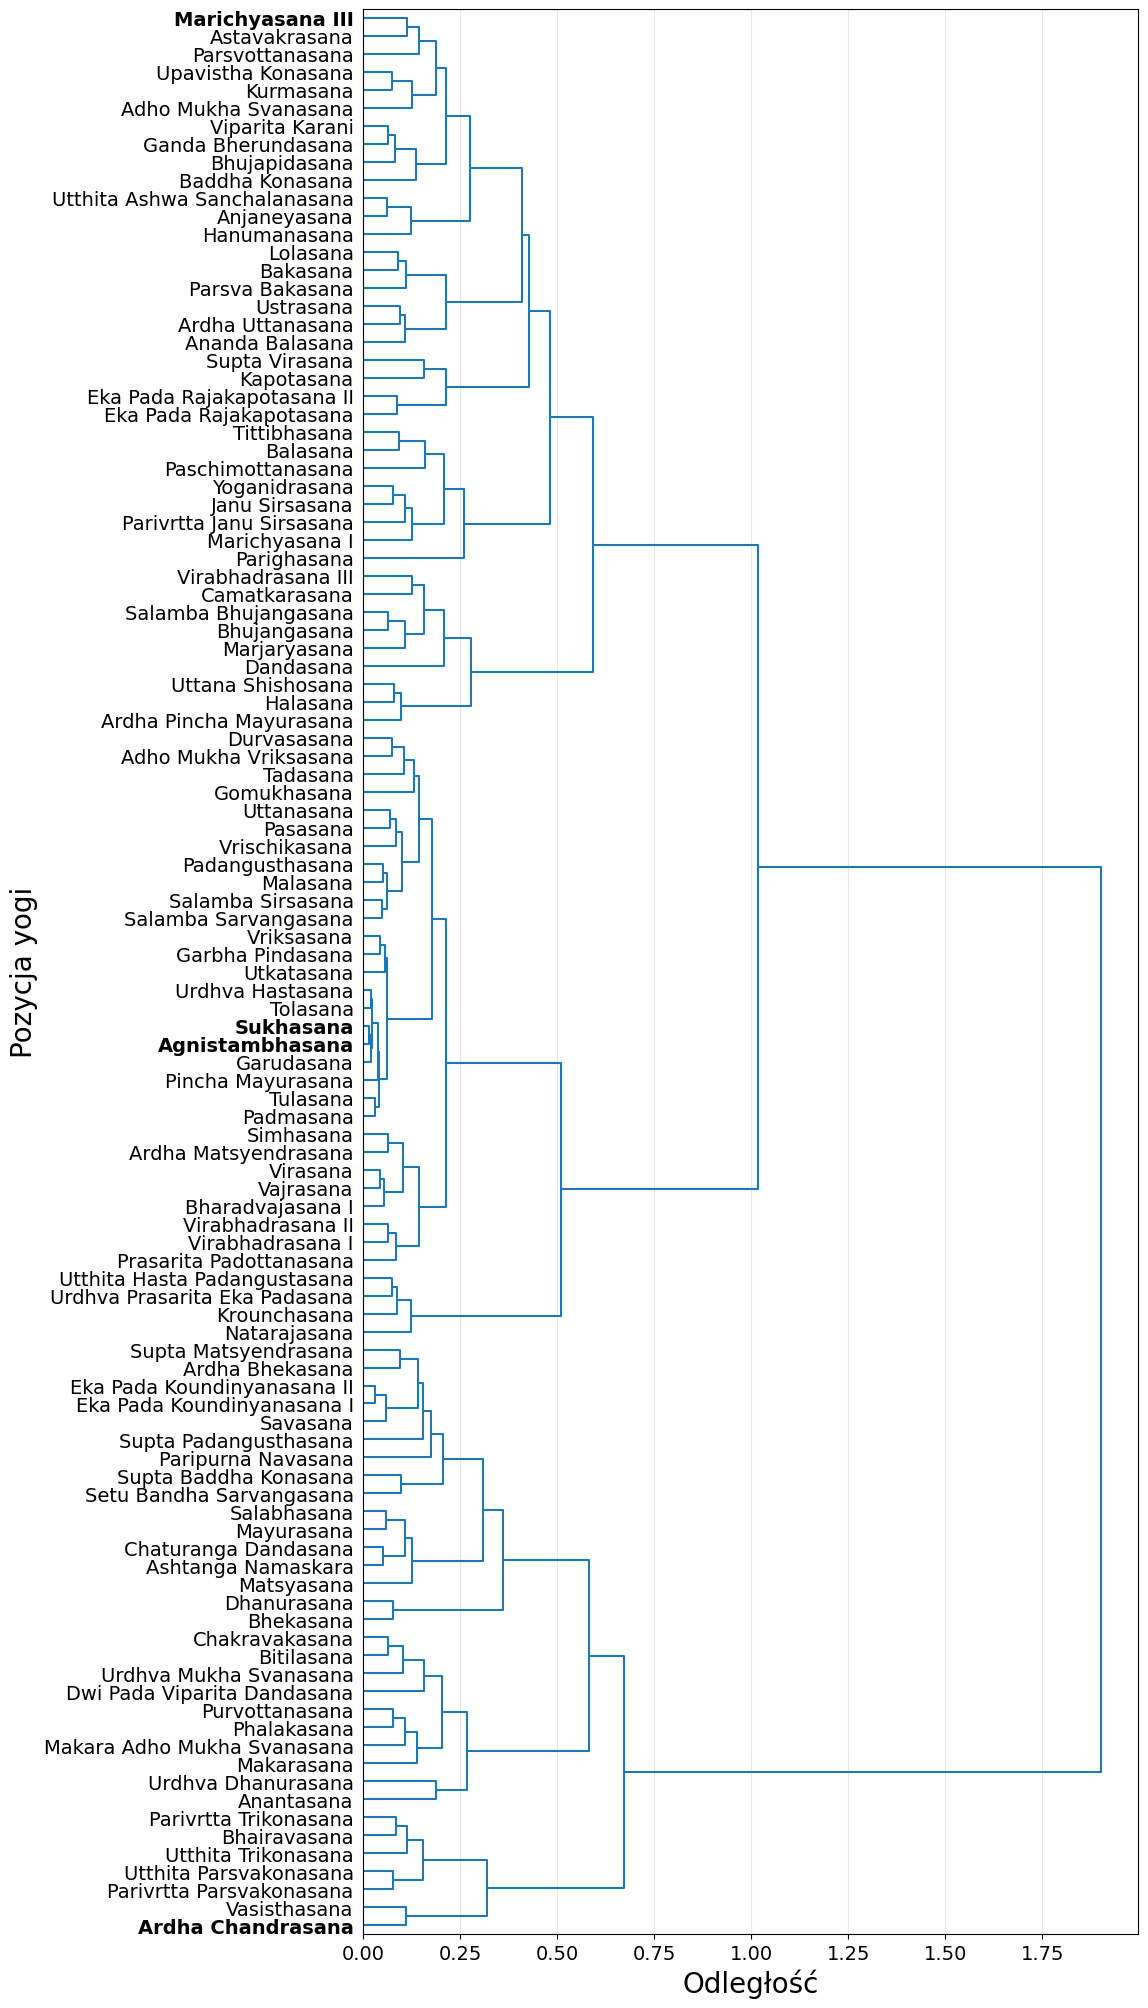

In [74]:
comp_poses = ['agnistambhasana', 'sukhasana', 'marichyasana iii', 'ardha chandrasana']

pose_labels = [
    re.sub(r"\sIi$", " II", re.sub(r"\sIii$", " III", label.title()))
    for label in pose_var_df.index
]

plt.figure(figsize=(10, 25))
sch.dendrogram(sch.linkage(pose_var_df.values, method='ward'),
    labels=pose_labels,
    orientation='right',
    color_threshold=0,
)

# plt.title('Dendrogram - Hierarchiczne grupowanie pozycji yogi', fontsize=16)
plt.xlabel('Odległość', fontsize=20)
plt.ylabel('Pozycja yogi', fontsize=20)

plt.xticks(fontsize=14)
for label in plt.gca().get_yticklabels():
    if label.get_text().lower() in comp_poses:
        label.set_fontweight('bold')

plt.yticks(fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.show()

## Pozycje nabliższe sobie względem wariancji położenia

Sukhasana | Agnistambhasana
:---: | :---:
![Sukhasana-example](data/sukhasana-example.png) | ![Agnistambhasana-example](data/agnistambhasana-example.png)

## Pozycje najdalsze względem wariancji położenia

Marichyasana III | Ardha Chandrasana
:---: | :---:
![marichyasana-iii-example](data/marichyasana_iii_example.png) | ![ardha-chandrasana-example](data/ardha_chandrasana_example.png)